In [60]:
# Load libraries
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np
import keras
from keras.utils import to_categorical

Using TensorFlow backend.


Useful resources:
- https://medium.com/@himanshubeniwal/handwritten-digit-recognition-using-machine-learning-ad30562a9b64

### Load dataset

In [48]:
x = np.loadtxt('data.txt', skiprows=0)

In [49]:
# possible digits
digits = np.array([0,1,2,3,4,5,6,7,8,9])

In [50]:
# create target vector by repeating digits 200 times
y = np.repeat(digits, 200, axis=0)

### Normalize digits

In [51]:
print(x[1][40])

i = 0
while i < 2000:
    j = 0
    while j < 240:
        x[i][j] = x[i][j]/6
        j += 1
    i += 1
        
print(x[1][40])

6.0
1.0


In [52]:
print(x[1])

[0.         0.         0.         0.         0.         0.
 0.16666667 0.5        0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.16666667 0.         0.         0.         0.
 0.         0.16666667 0.66666667 1.         1.         1.
 1.         1.         1.         1.         0.83333333 0.
 0.         0.         0.         0.5        1.         1.
 0.83333333 0.16666667 0.16666667 0.83333333 1.         1.
 1.         1.         0.5        0.         0.33333333 1.
 1.         1.         0.66666667 0.         0.         0.
 0.5        1.         1.         1.         1.         0.5
 0.         0.5        1.         1.         1.         0.16666667
 0.         0.         0.         0.5        1.         1.
 1.         1.         0.5        0.         0.66666667 1.
 1.         0.33333333 0.         0.         0.         0.
 0.33333333 1.         1.         1.         1.         0.5
 0.         1.         1.         1.         0.         0.
 0.         0.         0.         0.16

In [53]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [54]:
digit = {}
i = 0
while i < 10:
    n = i * 200
    digit[i] = list(chunks(x[n], 15))
    i += 1
#x0 = list(chunks(x[0], 15))

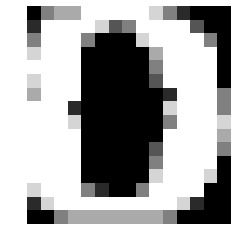

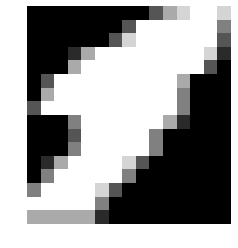

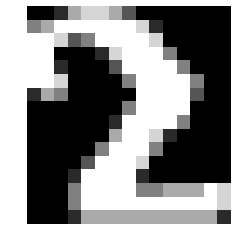

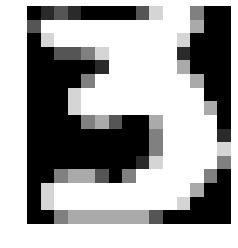

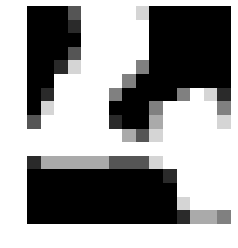

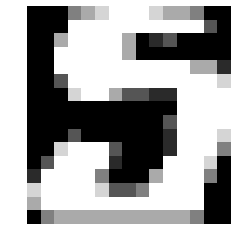

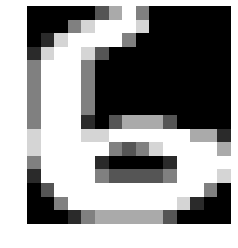

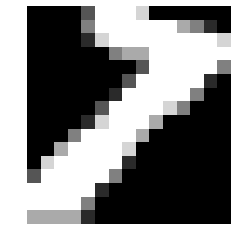

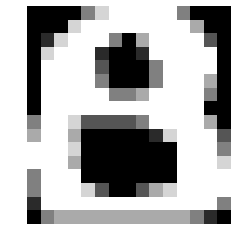

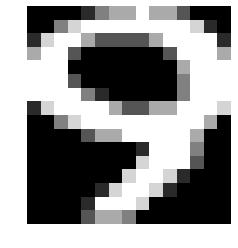

In [55]:
i = 0
while i < 10:    
    plt.imshow(digit[i], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    i += 1

In [56]:
# split into train and test
train_x = np.concatenate([x[0:100],x[200:300],x[400:500],x[600:700],x[800:900],x[1000:1100],x[1200:1300],x[1400:1500],x[1600:1700],x[1800:1900]])
train_y = np.repeat(digits, 100, axis=0)
test_x = np.concatenate([x[100:200],x[300:400],x[500:600],x[700:800],x[900:1000],x[1100:1200],x[1300:1400],x[1500:1600],x[1700:1800],x[1900:2000]])
test_y = np.repeat(digits, 100, axis=0)

## Principal Component Analysis

Based on sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Plotting the total explained variance ratio with an increasing number of included PCs.

For some algorithms it might be helpful to limit the number of included PCs

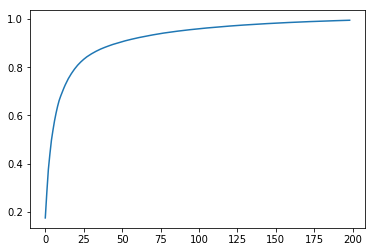

In [41]:
from sklearn.decomposition import PCA

tot_expl_var = []
for i in range(1, 200):
    tot_expl_var.append(sum(PCA(n_components=i).fit(x).explained_variance_ratio_))
    
plt.plot(tot_expl_var)

## Basic SVM Algorithm(s)

Based on SKLearn Docs: https://scikit-learn.org/stable/modules/svm.html

Polynomial seems best, all other kernels did well, but not this well. If combined with proper preprocessing, the SVM should be investigated again, I guess. Accuracy seems irritatingly high however, considering that it is just the very basic SVM algorithm that was used here.

### Polynominal Kernel w/ 3 df


In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svc = svm.SVC(kernel="poly", degree=3, decision_function_shape="ovo")
svc.fit(train_x, train_y)
pred_y = svc.predict(test_x)
print(pred_y)

accuracy_score(test_y, pred_y)

C:\Users\nikla\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 4 1 1 1
 1 7 1 1 1 1 1 1 4 1 1 1 1 1 7 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 7 1 1 7
 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 4 1 1 1 1 9 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 7 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

0.937

### Linear Kernel


In [40]:
svc = svm.SVC(kernel="linear", decision_function_shape="ovo")
svc.fit(train_x, train_y)
pred_y = svc.predict(test_x)
print(pred_y)

accuracy_score(test_y, pred_y)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 3 3 3 3 3 3 3
 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4
 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

0.964

### Neural network

In [43]:
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


#### One hot encoding

> 97.500
> 96.000
> 96.500
> 95.500
> 96.000


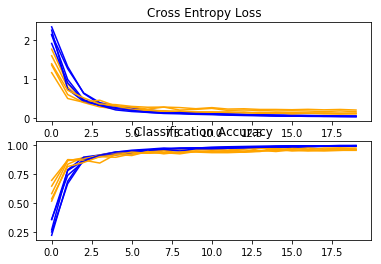

Accuracy: mean=96.300 std=0.678, n=5


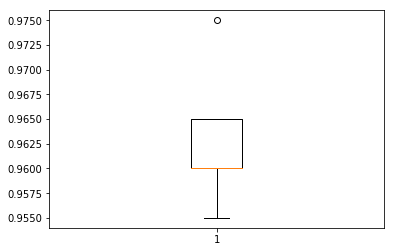

In [84]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    trainY = to_categorical(train_y)
    testY = to_categorical(test_y)

    trainX = train_x.reshape((train_x.shape[0], 15, 16, 1))
    testX = test_x.reshape((test_x.shape[0], 15, 16, 1))
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(15, 16, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=20, batch_size=100, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()
